In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [2]:
feature1 = []
for i in range(100):
    feature1.append(np.random.random())

feature2 = []
for i in range(100):
    feature2.append(np.random.random())

df = pd.DataFrame({'feature1':feature1,'feature2':feature2})
df['label'] = 0


In [5]:
feature1 = []
for i in range(100):
    feature1.append(np.random.random() + 0.5)
feature2 = []
for i in range(100):
    feature2.append(np.random.random() + 0.6)
df2 = pd.DataFrame({'feature1':feature1,'feature2':feature2})
df2['label'] = 1
final_df = pd.concat([df,df2], ignore_index=True)
final_df


,feature1,feature2,label
0,0.364233,0.154892,0
1,0.526425,0.611398,0
2,0.596914,0.970898,0
3,0.626386,0.700883,0
4,0.590695,0.741125,0
...,...,...,...
195,1.280247,0.833018,1
196,1.336944,1.199473,1
197,1.419192,0.875730,1
198,0.855322,0.934977,1


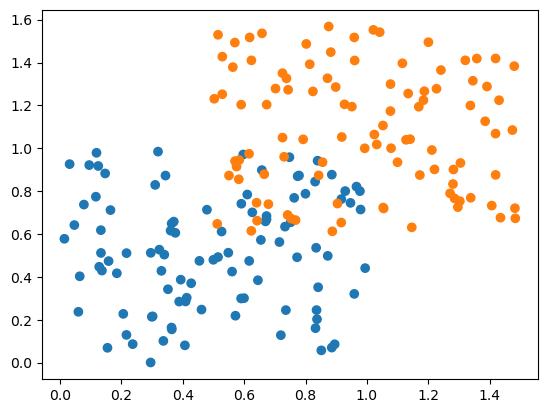

In [6]:
colors = []
for i in range(len(final_df)):
    colors.append('C'+str(int(final_df.label.iloc[i])))

plt.scatter(final_df.feature1, final_df.feature2, c=colors)

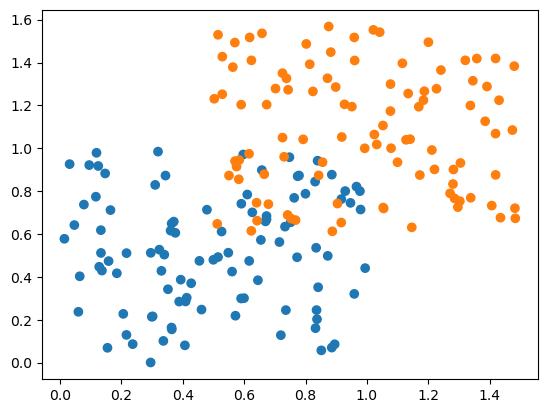

In [7]:
plt.scatter(final_df.feature1, final_df.feature2, c=['C' + str(int(x)) for x in final_df.label])

In [9]:
final_df.loc[len(final_df)] = [1.1,0.7,2]
#adding a new row to the end of the dataframe

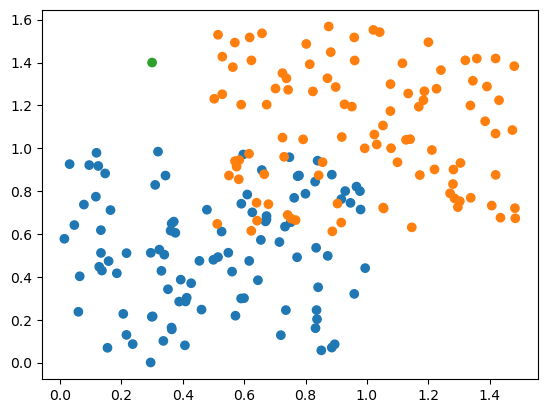

In [12]:
test_index = final_df.index[len(final_df) - 1]
final_df.loc[test_index, 'feature1'] = 0.3
final_df.loc[test_index, 'feature2'] = 1.4
plt.scatter(final_df.feature1, final_df.feature2, c=['C'+str(int(x)) for x in final_df.label])

In [17]:
test_row = final_df.iloc[-1]
train_df =final_df.iloc[:-1]
closest_dist = 999999999
closest_label = -1
for i in range(len(final_df)):
    train_row = train_df.iloc[i]
    dist = np.sqrt((train_row.feature1 - test_row.feature1) **2+ (train_row.feature2 - train_row.feature2) **2)
    if dist < closest_dist:
        closest_dist = dist
        closest_label = train_row['label']

print('closest distance:', closest_dist)
print('predicted label:', closest_label)


IndexError: single positional indexer is out-of-bounds

In [18]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(3)
train_df = final_df.iloc[:190]
test_df = final_df.iloc[190:]
features = ['feature1','feature2']
train_X = train_df[features]
train_y = train_df.label
model.fit(train_X,train_y)

test_X = test_df[features]
pred_y =model.predict(test_X)
pred_y

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.])

In [20]:
prediction = model.predict_proba(test_X)
prediction

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.        , 1.        ]])